# Machine Learning Homework 1

In [434]:
import numpy as np
import matplotlib.pyplot as plt

n = 3
l = 10000

In [435]:
# preprocess input file

data_points = []
with open('test.txt', 'r') as f:
    for line in f.read().splitlines():
        x, y = line.split(',')
        data_points.append((float(x), float(y)))
data_points = np.array(data_points)
print(data_points)

[[-5.         51.76405235]
 [-4.79591837 45.42306433]
 [-4.59183673 41.2744481 ]
 [-3.97959184 26.6362165 ]
 [-3.57142857 20.25680606]
 [-2.95918367 11.61842924]
 [-2.75510204 10.45052507]
 [-1.73469388  1.84809823]
 [-1.32653061 -1.04053496]
 [-0.91836735 -4.6146308 ]
 [-0.71428571 -1.38719773]
 [-0.30612245 -1.9916444 ]
 [ 0.10204082 -0.91292461]
 [ 0.71428571  6.63482003]
 [ 1.12244898  9.54686746]
 [ 1.73469388 15.72016147]
 [ 1.93877551 20.62251684]
 [ 2.55102041 33.48059726]
 [ 2.95918367 40.76391966]
 [ 3.97959184 66.89976056]
 [ 4.3877551  78.44316466]
 [ 4.59183673 86.99156782]
 [ 5.         99.78725972]]


In [436]:
# get inverse of matrix

def inverse(matrix):
    size = matrix.shape[0]
    
    # LU decomposition
    U = np.copy(matrix)
    L = np.identity(size)
    
    for i in range(size):
        for j in range(i+1, size):
            rate = U[j][i]/U[i][i]
            U[j] = U[j] - U[i]*rate
            L[j][i] = rate
    
    # calculate inverse of matrix
    I = np.identity(size)
    D = np.zeros((size, size))
    for i in range(size):
        d = np.zeros(size)
        d[0] = I[i, 0]
        for j in range(1, size):
            d[j] = I[i, j] - L[j,:j].dot(d[:j])
        D[:, i] = d
    inv = np.zeros((size, size))
    for i in range(size):
        v = np.zeros(size)
        v[size-1] = D[size-1, i]/U[size-1, size-1]
        for j in range(size-2, -1, -1):
            v[j] = (D[j, i] - U[j, j+1:].dot(v[j+1:]))/U[j, j]
        inv[:, i] = v
    
    return inv

## Least Square Error

In [437]:
# perform LSE

A = np.ones((data_points.shape[0], n))
for i in range(1, n):
    A[:, n-i-1] = data_points[:, 0]**i
b = data_points[:, 1]    

lse_result = inverse(A.transpose().dot(A) + l*np.identity(A.shape[1])).dot(A.transpose()).dot(b)
print(lse_result)

[0.83453328 0.0931482  0.0469507 ]


## Newton's Method

In [438]:
# calculate Hessian

max_power = 2*n-2
x_power_sum = np.zeros(max_power+1)
for i in range(max_power+1):
    x_power_sum[i] = (data_points[:, 0]**(max_power-i)).sum()
H = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        H[i, j] = 2*x_power_sum[i+j]
inv_H = inverse(H)

In [439]:
old_x = np.ones((n, 1))
new_x = np.Infinity*np.ones((n, 1))

def distance(x, y):
    v = x - y
    dist = (v**2).sum()**0.5
    return dist

min_pass_dist = 0.001

while True:
    d_f = np.zeros((n, 1))
    for i in range(n):
        d_f[i] = sum([2*(data_points[j, 0]**(n-i-1))*(sum([old_x[k]*(data_points[j, 0]**(n-k-1)) for k in range(n)])-data_points[j, 1]) for j in range(data_points.shape[0])])
    new_x = old_x - inv_H.dot(d_f.reshape(n, 1))
    if distance(old_x, new_x) < min_pass_dist:
        break
    else:
        old_x = new_x
    
newton_method_result = new_x[:, 0]
print(newton_method_result)

[ 3.02385339  4.90619026 -0.23140176]


# Results and Comparisson

LSE
Fitting line: 0.834533x^2 + 0.093148x^1 + 0.046951
Total error: 22649.738493


Newton's method
Fitting line: 3.023853x^2 + 4.906190x^1 + -0.231402
Total error: 26.559959


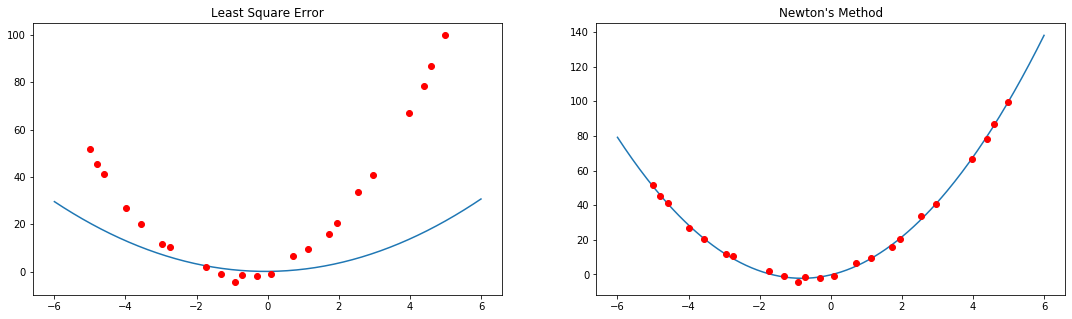

In [440]:
M = np.max(data_points[:, 0])
m = np.min(data_points[:, 0])
left = m - (M-m)*0.1
right = M + (M-m)*0.1

x = np.linspace(left, right, data_points.shape[0]*10)
_x = np.ones((x.size, n))
for i in range(1, n):
    _x[:, n-i-1] = x**i
lse_y = _x.dot(lse_result)
newton_y = _x.dot(newton_method_result)


# graph

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18.5, 5)
axs[0].plot(x, lse_y)
axs[0].plot(data_points[:, 0], data_points[:, 1], 'ro')
axs[0].set_title('Least Square Error')
axs[1].plot(x, newton_y)
axs[1].plot(data_points[:, 0], data_points[:, 1], 'ro')
axs[1].set_title('Newton\'s Method')


# comparisson

def square_error(points, line):
    _x = np.ones((points.shape[0], line.size))
    for i in range(1, line.size):
        _x[:, n-i-1] = data_points[:, 0]**i
    _y = _x.dot(line)
    se = sum((data_points[:, 1] - _y)**2)
    return se

print('LSE')
print('Fitting line: ', end='')
for i in range(n-1, -1, -1):
    if i != 0:
        print('{:f}x^{:d} + '.format(lse_result[n-i-1], i), end='')
    else:
        print('{:f}'.format(lse_result[n-i-1]))
print('Total error: {:f}'.format(square_error(data_points, lse_result)))
print('\n')
print('Newton\'s method')
print('Fitting line: ', end='')
for i in range(n-1, -1, -1):
    if i != 0:
        print('{:f}x^{:d} + '.format(newton_method_result[n-i-1], i), end='')
    else:
        print('{:f}'.format(newton_method_result[n-i-1]))
print('Total error: {:f}'.format(square_error(data_points, newton_method_result)))